# 3-0. Factor clustering
A Baseline model. Cryptocurrencies are partitioned into four clusters, based on __CSMB__ and __Price-Volume (Dollar Volume in Finance)__ factor. The CSMB factor means return difference between small and big market cap size portfolios. Price-Volume factor is average daily Volume * Price.<br>

- Sectioning is conducted based on market cap as of December 31, 2021 (last date)
- average daily log Volume * Price

Statistical properties of cluters are shown. Representative time series of each clusters are obtained in order to compare results of effienct frontiers.

OUTPUT PATH: rts

In [ ]:
from utils.cluster_stats import get_stats, rank_matching
from utils.cluster_dist_plot import get_dist_plot, plot_annlr, plot_boxplot
from utils.cluster_rep_ts import get_rep_ts

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [ ]:
# log return data
df_lr = pd.read_csv("data/coin_log_return.csv")

lr_data = pd.read_csv(f"data/coin_log_return.csv")
lr_data = lr_data.T
lr_data = lr_data.drop(columns=[0]) # drop zero return

price_data = pd.read_csv(f"data/coingecko_usd_price.csv").drop(columns=["uts"])
price_data = price_data.T

# market cap data
df_m = pd.read_csv("data/coingecko_usd_market_cap.csv").drop(columns="uts")

In [ ]:
# dataframe for factor
df_factor = pd.DataFrame(columns=["token", "size_factor", "price_volume_factor", "market_cap", "price_volume"])
df_factor["token"] = df_m.columns

In [ ]:
# CSMB partitioning
large_cap = 1000000000 * 10
small_cap = 1000000000

mask = df_m.iloc[-1,:] < small_cap
small = df_m.iloc[-1,:][mask]
mask = df_m.iloc[-1,:] >= small_cap
large = df_m.iloc[-1,:][mask]

for i in small.index:
    df_factor.loc[df_factor["token"] == i , ["size_factor", "market_cap"]] = "small", small[i]
for i in large.index:
    df_factor.loc[df_factor["token"] == i , ["size_factor", "market_cap"]] = "large", large[i]

In [ ]:
# volume and price data
df_volume = pd.read_csv("data/coingecko_volume.csv").drop(columns="uts")
df_price = pd.read_csv(f"data/coingecko_usd_price.csv").drop(columns=["uts"])

In [ ]:
# Price-Volume factor partitioning

# computing Price-Volume of cryptocurrencies
price_volume = np.log(df_volume.mean(axis=0)) * df_price.mean(axis=0)
price_volume = price_volume.sort_values(ascending=False)

top_i = int(len(price_volume)*0.4)

large_pvolume = price_volume[:top_i]
small_pvolume = price_volume[top_i:]

for i in large_pvolume.index:
    df_factor.loc[df_factor["token"] == i , ["price_volume_factor", "price_volume"]] = "large", large_pvolume[i]
for i in small_pvolume.index:
    df_factor.loc[df_factor["token"] == i , ["price_volume_factor", "price_volume"]] = "small", small_pvolume[i]

In [ ]:
df_factor

,token,size_factor,price_volume_factor,market_cap,price_volume
0,tether,large,small,78441569755.062698,25.277236
1,bitcoin,large,large,892648631305.541626,1164865.105138
2,ethereum,large,large,441654436877.796021,67108.115641
3,binance-usd,large,small,14720343026.364941,22.379487
4,usd-coin,large,small,42428767390.304565,21.740867
...,...,...,...,...,...
141,swissborg,small,small,573024459.169086,12.100328
142,nxm,small,large,853921643.69427,1223.561086
143,coinmetro,small,small,170988765.47359,4.477081
144,compound-usdt,small,small,822327623.951394,0.348615


# Figure
In logarithmic scale (Cluster labels need to be modified based on statistical results)

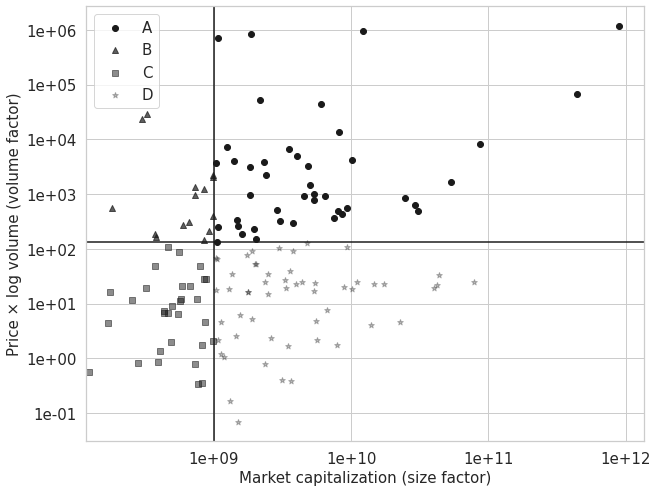

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = df_factor.copy()

sns.set(style = "whitegrid")
fs = 15

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

df_0 = df.loc[(df["size_factor"]=="large") & (df["price_volume_factor"]=="large")]
df_1 = df.loc[(df["size_factor"]=="large") & (df["price_volume_factor"]=="small")]
df_2 = df.loc[(df["size_factor"]=="small") & (df["price_volume_factor"]=="large")]
df_3 = df.loc[(df["size_factor"]=="small") & (df["price_volume_factor"]=="small")]

x_0 = df_0["market_cap"]
y_0 = df_0["price_volume"]

x_1 = df_1["market_cap"]
y_1 = df_1["price_volume"]

x_2 = df_2["market_cap"]
y_2 = df_2["price_volume"]

x_3 = df_3["market_cap"]
y_3 = df_3["price_volume"]


# define and map colors
colors = sns.color_palette("husl",4).as_hex()

ax.set_xlabel("Market capitalization (size factor)", fontsize=fs)
ax.set_ylabel("Price × log volume (volume factor)", fontsize=fs)
ax.set(xscale="log", yscale="log")

s_1 = ax.scatter(x=x_0, y=y_0, c="k", label="A", marker="o")
s_0 = ax.scatter(x=x_2, y=y_2, c="k", label="B", marker="^", alpha=0.7)
s_3 = ax.scatter(x=x_3, y=y_3, c="k", label="C", marker="s", alpha=0.5)
s_2 = ax.scatter(x=x_1, y=y_1, c="k", label="D", marker="*", alpha=0.3)

#Drawing a horizontal line at point 0.
ax.axhline(price_volume[top_i-1], color="k")
ax.axvline(small_cap, color="k")

ax.legend(title="Cluster", fontsize=fs)


ylabels = ["{:.0e}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels, size = fs)
xlabels = ["{:.0e}".format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, size = fs)

plt.legend(fontsize=fs)
plt.show()

In [ ]:
# the number of cryptocurrencies in clusters
print(len(df_0))
print(len(df_1))
print(len(df_2))
print(len(df_3))

43
54
15
34


------

## Clusters' statistics

In [ ]:
df_factor.loc[(df_factor["size_factor"]=="large") & (df_factor["price_volume_factor"]=="large"), "label"] = 0
df_factor.loc[(df_factor["size_factor"]=="large") & (df_factor["price_volume_factor"]=="small"), "label"] = 1
df_factor.loc[(df_factor["size_factor"]=="small") & (df_factor["price_volume_factor"]=="large"), "label"] = 2
df_factor.loc[(df_factor["size_factor"]=="small") & (df_factor["price_volume_factor"]=="small"), "label"] = 3

In [ ]:
labels = df_factor["label"].to_numpy()
cluster_lr = get_cluster_time_series(labels, df_lr.T)

In [ ]:
# statistics dataframe
df_stat_R, df_stat_lr, annl_R, annl_lr, annl_lr_std, MDD = get_stats(labels, price_data, lr_data)

# clusters' statistics
df_ranked_stat_lr = rank_matching(df_stat_lr)

In [ ]:
df_ranked_stat_lr

,cluster,log_return_mean[%],log_return_mean_std[%],log_return_median[%],log_return_std[%],log_return_std_std[%],skewness,kurtosis,mdd_mean[%],mdd_median[%],num_coins,common_cluster_label
1,1.0,178.724470,161.003318,161.873127,135.585497,68.855913,0.699739,-0.309272,60.177831,71.396486,54,A
0,0.0,159.320446,135.167359,130.965815,143.049774,28.949216,0.982742,0.360435,70.127592,73.240771,43,B
3,3.0,158.447217,101.225408,150.806766,149.080242,50.853337,0.788148,0.874112,68.376701,73.750273,34,C
2,2.0,118.089775,103.379730,90.147576,134.492698,52.036804,0.664729,-0.616483,66.505304,74.867738,15,D


In [ ]:
# clusters' annaulized log return distribution
df_dist_plot = get_dist_plot(df_ranked_stat_lr, annl_lr, annl_lr_std, MDD)

In [ ]:
df_dist_plot

,crypto_annualised_log_return[%],crypto_annualised_std[%],crypto_mdd[%],common_cluster_label
72,94.861493,147.737999,73.662824,A
67,-5.250861,150.801479,77.195915,A
66,0.144032,8.319764,3.081061,A
65,179.529599,150.412538,69.304963,A
64,225.461303,138.113761,65.541639,A
...,...,...,...,...
109,336.460296,214.781974,74.860660,D
110,240.975572,171.967694,78.483148,D
111,148.077727,105.880284,57.040334,D
104,20.767625,135.427199,81.022801,D


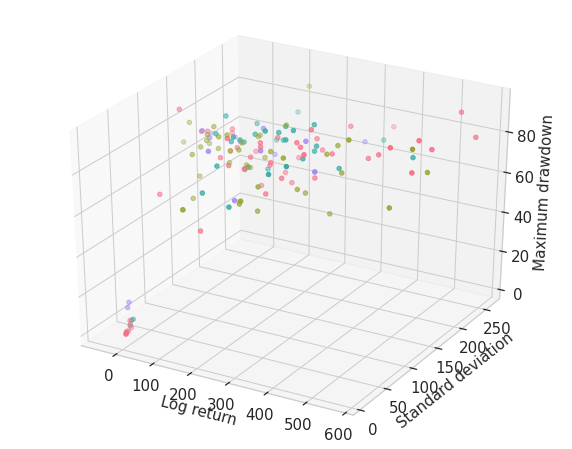

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = df_dist_plot.copy()

sns.set(style = "whitegrid")
fs = 15

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

x_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_log_return[%]"]
y_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_std[%]"]
z_a = df[df["common_cluster_label"]=="A"]["crypto_mdd[%]"]

x_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_log_return[%]"]
y_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_std[%]"]
z_b = df[df["common_cluster_label"]=="B"]["crypto_mdd[%]"]

x_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_log_return[%]"]
y_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_std[%]"]
z_c = df[df["common_cluster_label"]=="C"]["crypto_mdd[%]"]

x_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_log_return[%]"]
y_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_std[%]"]
z_d = df[df["common_cluster_label"]=="D"]["crypto_mdd[%]"]

# define and map colors
colors = sns.color_palette("husl",4).as_hex()

ax.set_xlabel("Log return", fontsize=fs)
ax.set_ylabel("Standard deviation", fontsize=fs)
ax.set_zlabel("Maximum drawdown", fontsize=fs)

s_a = ax.scatter(x_a, y_a, z_a, c=colors[0], label="A")
s_b = ax.scatter(x_b, y_b, z_b, c=colors[1], label="B")
s_c = ax.scatter(x_c, y_c, z_c, c=colors[2], label="C")
s_d = ax.scatter(x_d, y_d, z_d, c=colors[3], label="D")

# produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="cluster")
# ax.add_artist(legend1)
# ax.legend(fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=fs)

plt.show()

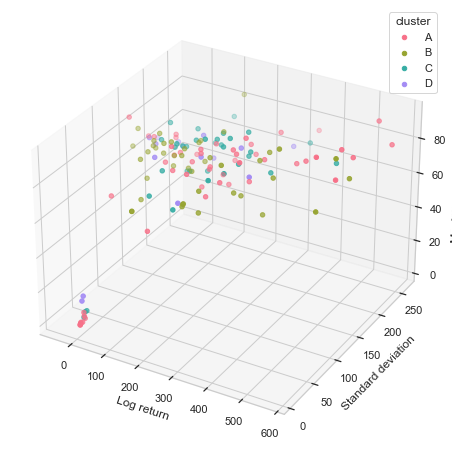

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = df_dist_plot.copy()

sns.set(style = "whitegrid")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

x_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_log_return[%]"]
y_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_std[%]"]
z_a = df[df["common_cluster_label"]=="A"]["crypto_mdd[%]"]

x_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_log_return[%]"]
y_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_std[%]"]
z_b = df[df["common_cluster_label"]=="B"]["crypto_mdd[%]"]

x_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_log_return[%]"]
y_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_std[%]"]
z_c = df[df["common_cluster_label"]=="C"]["crypto_mdd[%]"]

x_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_log_return[%]"]
y_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_std[%]"]
z_d = df[df["common_cluster_label"]=="D"]["crypto_mdd[%]"]

# define and map colors
colors = sns.color_palette("husl",4).as_hex()

ax.set_xlabel("Log return")
ax.set_ylabel("Standard deviation")
ax.set_zlabel("Maximum drawdown")

s_a = ax.scatter(x_a, y_a, z_a, c=colors[0], label="A")
s_b = ax.scatter(x_b, y_b, z_b, c=colors[1], label="B")
s_c = ax.scatter(x_c, y_c, z_c, c=colors[2], label="C")
s_d = ax.scatter(x_d, y_d, z_d, c=colors[3], label="D")

# produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="cluster")
# ax.add_artist(legend1)
ax.legend(title="cluster")

plt.show()

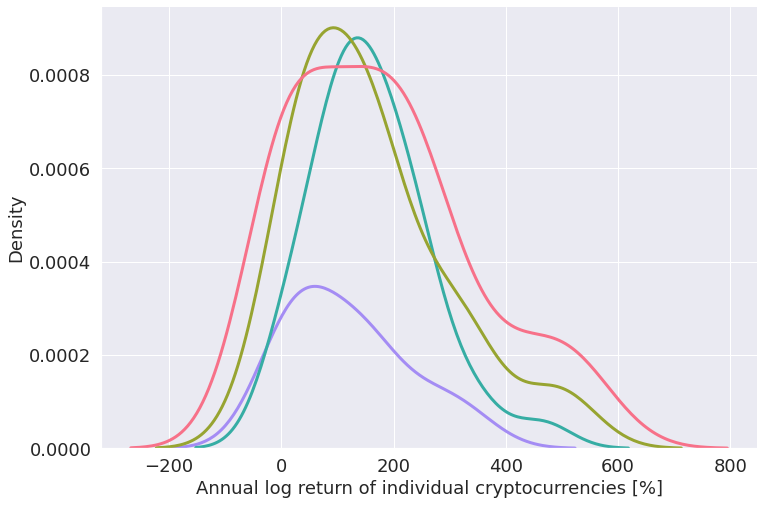

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_model_dist = df_dist_plot

fs = 18
# sns.set_context("poster")
# sns.set_theme(style="whitegrid", palette="husl")
sns.set_theme(style="darkgrid", palette=sns.color_palette("husl",4))

g = sns.displot(data=df_model_dist, x="crypto_annualised_log_return[%]", hue="common_cluster_label",
                kind="kde",
                height=7, aspect=1.5,
                linewidth=3.
               )
g.set_xlabels("Annual log return of individual cryptocurrencies [%]", fontsize=fs)
g.set_ylabels(fontsize=fs)
g.set_titles("{col_name}")
g._legend.remove()

# tick size
plt.tick_params(axis='both', which='major', labelsize=fs)

# g._legend.set_title(title="cluster")

[Text(0, 0.5, 'cluster'), Text(0.5, 0, 'maximum drawdown [%]')]

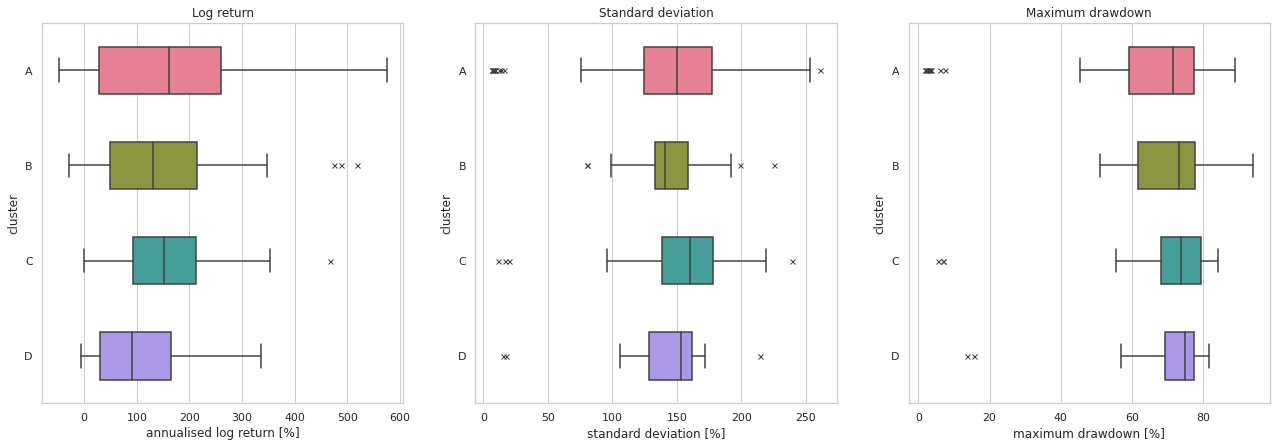

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(22,7))
# fig.suptitle("Log return")

sns.set_context("notebook")
sns.set(rc={'figure.figsize':(11.7,7.27)})
sns.set_theme(style="whitegrid")

# 로그 수익률 Boxplot
g_r = sns.boxplot(
    data=df_dist_plot, x="crypto_annualised_log_return[%]", y="common_cluster_label",
    showcaps=True, width=0.5, palette="husl",
    flierprops={"marker": "x"},
    ax=axes[0]
)
g_r.set_title("Log return")
g_r.set(xlabel="annualised log return [%]",
      ylabel="cluster")

# 표준편차 Boxplot
g_s = sns.boxplot(
    data=df_dist_plot, x="crypto_annualised_std[%]", y="common_cluster_label",
    showcaps=True, width=0.5, palette="husl",
    flierprops={"marker": "x"},
    ax=axes[1]
)
g_s.set_title("Standard deviation")
g_s.set(xlabel="standard deviation [%]",
        ylabel="cluster")

# 최대낙폭 Boxplot
g_m = sns.boxplot(
    data=df_dist_plot, x="crypto_mdd[%]", y="common_cluster_label",
    showcaps=True, width=0.5, palette="husl",
    flierprops={"marker": "x"},
    ax=axes[2]
)
g_m.set_title("Maximum drawdown")
g_m.set(xlabel="maximum drawdown [%]",
        ylabel="cluster")

In [ ]:
labels = df_factor["label"].to_numpy()
labels

array([1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 3., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 3., 0.,
       1., 3., 1., 2., 1., 1., 0., 1., 2., 1., 0., 2., 1., 1., 0., 3., 3.,
       1., 3., 3., 3., 0., 1., 0., 2., 2., 1., 1., 2., 1., 0., 0., 3., 3.,
       3., 1., 2., 3., 3., 2., 1., 1., 3., 1., 3., 3., 3., 3., 1., 2., 3.,
       3., 2., 3., 1., 2., 2., 3., 3., 1., 2., 1., 3., 3., 3., 3., 0., 3.,
       3., 1., 2., 3., 0., 3., 2., 3., 3., 3.])

In [ ]:
# clusters' representative time series
df_ts = get_rep_ts(labels)

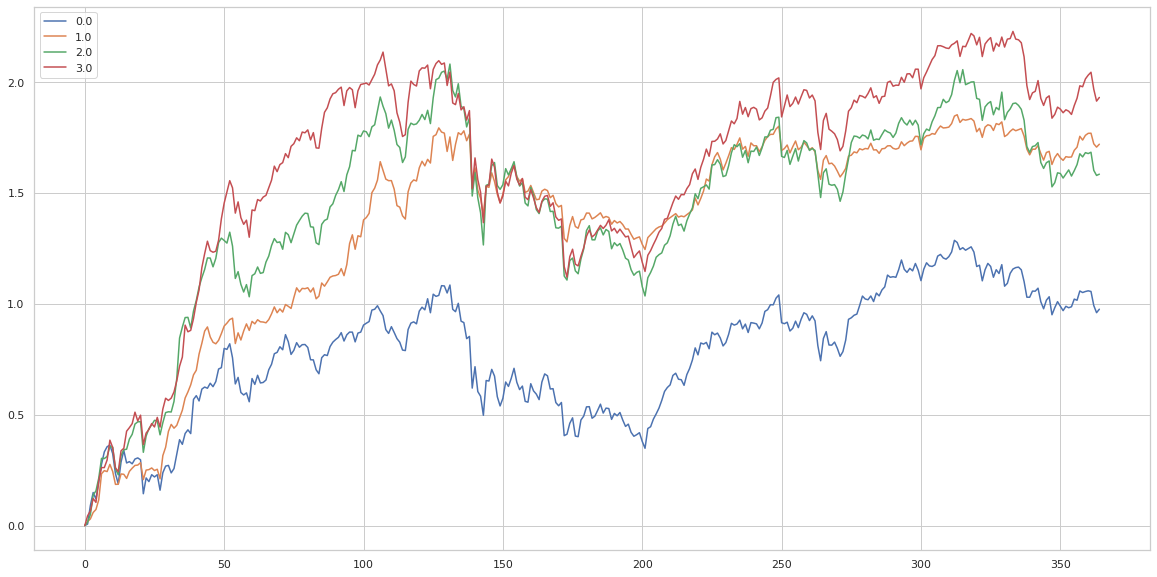

In [ ]:
df_ts.cumsum(axis=0).plot(figsize=(20,10))

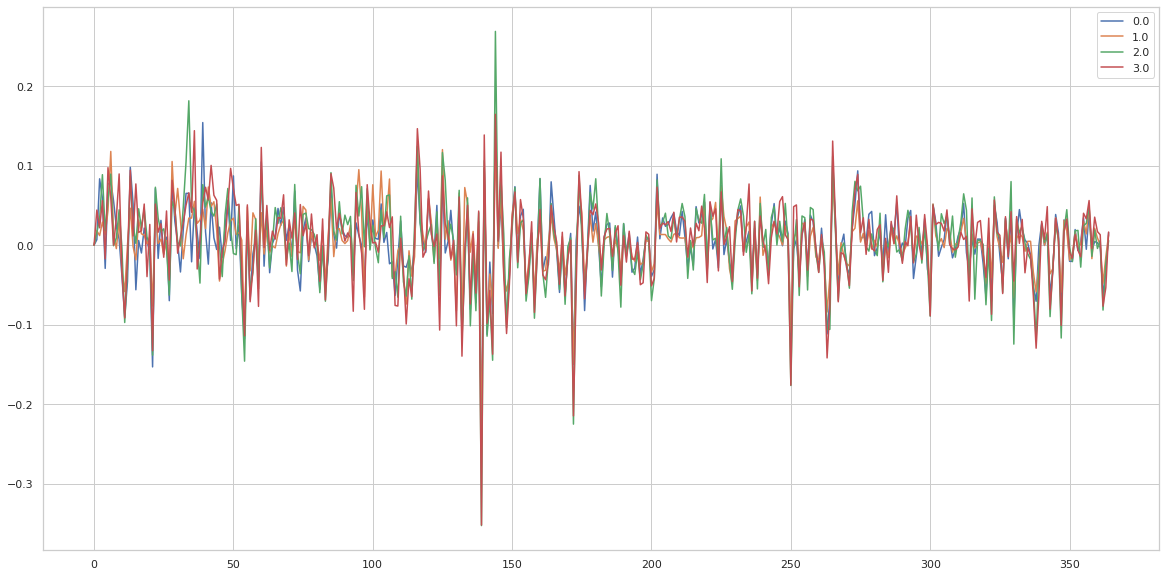

In [ ]:
df_ts.plot(figsize=(20,10))

In [ ]:
# save
df_ts.to_csv(f"rts/factor_weighted_average_time_series.csv", index=False)